In [1]:
from ACO import *
from Evaporator import *
from Initializer import *
from Intensifier import *
from Problem import TSPProblem
from SolutionGenerator import *
from Heuristics import TSPHeuristic
from Terminator import *
from EvolutionPlotter import plot_evolution
import numpy as np

In [2]:
import seaborn as sns

## Hyperparameters: rho vs. delta values

In [3]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
heuristic = None
terminator = maxItTerminator(maxIt=200)
solution_gen = PermutationSolutionGenerator(number_of_ants=10, alpha=1, beta=1, heuristic=heuristic, problem=problem)

In [4]:
rho_values = np.arange(0.04, 0.2, 0.04)
delta_values = np.arange(0.04, 0.2, 0.04)
best_scores = np.zeros(shape=(rho_values.shape[0], delta_values.shape[0]))
runs_per_config = 5

for i, rho in enumerate(rho_values):
    for j, delta in enumerate(delta_values):
        evaporator = Evaporator(rho=rho)
        intensifier = Intensifier(delta=delta)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores[i,j] += scores[-1,0]
        best_scores[i,j] /= runs_per_config
        print('rho: %f, delta: %f, score: %d' % (rho, delta, best_scores[i,j]))

rho: 0.040000, delta: 0.040000, score: 23462
rho: 0.040000, delta: 0.080000, score: 22884
rho: 0.040000, delta: 0.120000, score: 22799
rho: 0.040000, delta: 0.160000, score: 22532
rho: 0.080000, delta: 0.040000, score: 19821
rho: 0.080000, delta: 0.080000, score: 20066
rho: 0.080000, delta: 0.120000, score: 19846
rho: 0.080000, delta: 0.160000, score: 19581
rho: 0.120000, delta: 0.040000, score: 19016
rho: 0.120000, delta: 0.080000, score: 18872
rho: 0.120000, delta: 0.120000, score: 18431
rho: 0.120000, delta: 0.160000, score: 18910
rho: 0.160000, delta: 0.040000, score: 18602
rho: 0.160000, delta: 0.080000, score: 17643
rho: 0.160000, delta: 0.120000, score: 17297
rho: 0.160000, delta: 0.160000, score: 17828


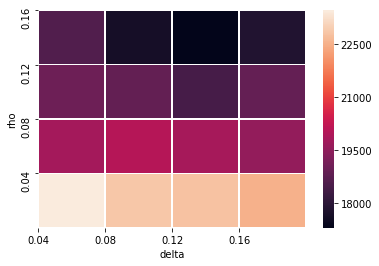

In [5]:
ax = sns.heatmap(np.flip(best_scores,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(delta_values)))
ax.set_yticks(np.arange(len(rho_values)))
ax.set_xticklabels(np.round(delta_values,2))
ax.set_yticklabels(np.flip(np.round(rho_values,2),axis=0))
ax.set_xlabel('delta')
ax.set_ylabel('rho')
plt.show()

## Hyperparameters: ants vs. rho / delta values

In [6]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
heuristic = None
terminator = maxItTerminator(maxIt=200)

In [10]:
update_values = np.arange(0.04, 0.2, 0.04)
numbers_of_ants = [1, 5, 10 ,15]
best_scores_1 = np.zeros(shape=(update_values.shape[0], len(numbers_of_ants)))
runs_per_config = 5

for i, update_value in enumerate(update_values):
    for j, ants in enumerate(numbers_of_ants):
        evaporator = Evaporator(rho=update_value)
        intensifier = Intensifier(delta=update_value)
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores_1[i,j] += scores[-1,0]
        best_scores_1[i,j] /= runs_per_config
        print('ants: %d, rho / delta: %f, score: %d' % (ants, update_value, best_scores_1[i,j]))

ants: 1, rho / delta: 0.040000, score: 28967
ants: 5, rho / delta: 0.040000, score: 24893
ants: 10, rho / delta: 0.040000, score: 23292
ants: 15, rho / delta: 0.040000, score: 22872
ants: 1, rho / delta: 0.080000, score: 28571
ants: 5, rho / delta: 0.080000, score: 22248
ants: 10, rho / delta: 0.080000, score: 19965
ants: 15, rho / delta: 0.080000, score: 18586
ants: 1, rho / delta: 0.120000, score: 30262
ants: 5, rho / delta: 0.120000, score: 21344
ants: 10, rho / delta: 0.120000, score: 18719
ants: 15, rho / delta: 0.120000, score: 17410
ants: 1, rho / delta: 0.160000, score: 28798
ants: 5, rho / delta: 0.160000, score: 20839
ants: 10, rho / delta: 0.160000, score: 18396
ants: 15, rho / delta: 0.160000, score: 16556


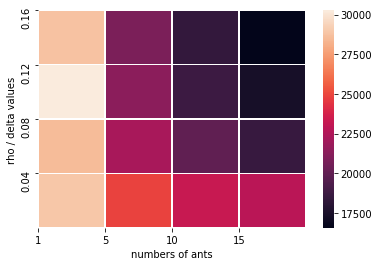

In [11]:
ax = sns.heatmap(np.flip(best_scores_1,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(update_values)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(update_values,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('rho / delta values')
plt.show()

## Hyperparameters: ants vs. considered number of solutions

In [14]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.06)
intensifier = Intensifier(delta=0.06)
heuristic = None
terminator = maxItTerminator(maxIt=200)

In [15]:
numbers_of_solutions = [1, 2, 3]
numbers_of_ants = [5, 10 ,15]
best_scores_2 = np.zeros(shape=(len(numbers_of_solutions), len(numbers_of_ants)))
runs_per_config = 5

for i, number_of_solutions in enumerate(numbers_of_solutions):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen,
                                       terminator, number_of_solutions, True)
            solutions, scores = aco.run()
            best_scores_2[i,j] += scores[-1,0]
        best_scores_2[i,j] /= runs_per_config
        print('ants: %d, considered solutions: %d, score: %d' % (ants, number_of_solutions, best_scores_2[i,j]))

ants: 5, considered solutions: 1, score: 22799
ants: 10, considered solutions: 1, score: 21410
ants: 15, considered solutions: 1, score: 20161
ants: 5, considered solutions: 2, score: 23568
ants: 10, considered solutions: 2, score: 21148
ants: 15, considered solutions: 2, score: 20009
ants: 5, considered solutions: 3, score: 25179
ants: 10, considered solutions: 3, score: 21462
ants: 15, considered solutions: 3, score: 20461


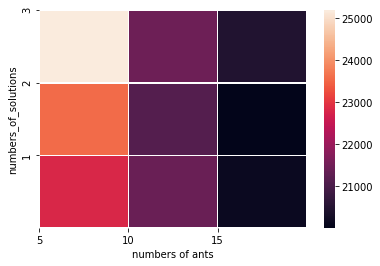

In [16]:
ax = sns.heatmap(np.flip(best_scores_2,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(numbers_of_solutions)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(np.round(numbers_of_solutions,2),axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('numbers_of_solutions')
plt.show()

## Hyperparameters: with vs. without distance heuristic

In [17]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.06)
intensifier = Intensifier(delta=0.06)
terminator = maxItTerminator(maxIt=200)

In [19]:
heuristics = [TSPHeuristic, None]
numbers_of_ants = [1, 5, 10 ,15]
best_scores_3 = np.zeros(shape=(len(heuristics), len(numbers_of_ants)))
runs_per_config = 5

for i, heuristic in enumerate(heuristics):
    for j, ants in enumerate(numbers_of_ants):
        solution_gen = PermutationSolutionGenerator(number_of_ants=ants, alpha=1, beta=1, heuristic=heuristic, problem=problem)
        for k in range(runs_per_config):
            aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)
            solutions, scores = aco.run()
            best_scores_3[i,j] += scores[-1,0]
        best_scores_3[i,j] /= runs_per_config
        print('ants: %d, heuristic: %s, score: %d' % (ants, heuristic, best_scores_3[i,j]))

ants: 1, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 7053
ants: 5, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5996
ants: 10, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5565
ants: 15, heuristic: <class 'Heuristics.TSPHeuristic'>, score: 5460
ants: 1, heuristic: None, score: 28917
ants: 5, heuristic: None, score: 23145
ants: 10, heuristic: None, score: 20801
ants: 15, heuristic: None, score: 19893


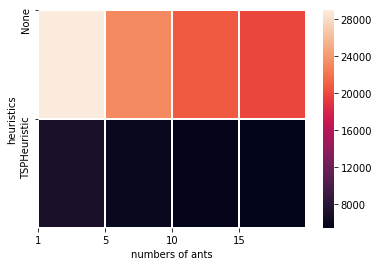

In [27]:
ax = sns.heatmap(np.flip(best_scores_3,axis=0), linewidth=0.5)
ax.set_xticks(np.arange(len(numbers_of_ants)))
ax.set_yticks(np.arange(len(heuristics)))
ax.set_xticklabels(np.round(numbers_of_ants,2))
ax.set_yticklabels(np.flip(['TSPHeuristic', 'None'],axis=0))
ax.set_xlabel('numbers of ants')
ax.set_ylabel('heuristics')
plt.show()

## Find ACO solution for problem 1

In [28]:
problem = TSPProblem(problem=1)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_1, scores_1 = aco.run()

In [29]:
print('Best score for problem 1, alpha=1, beta=0: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=0:  6371


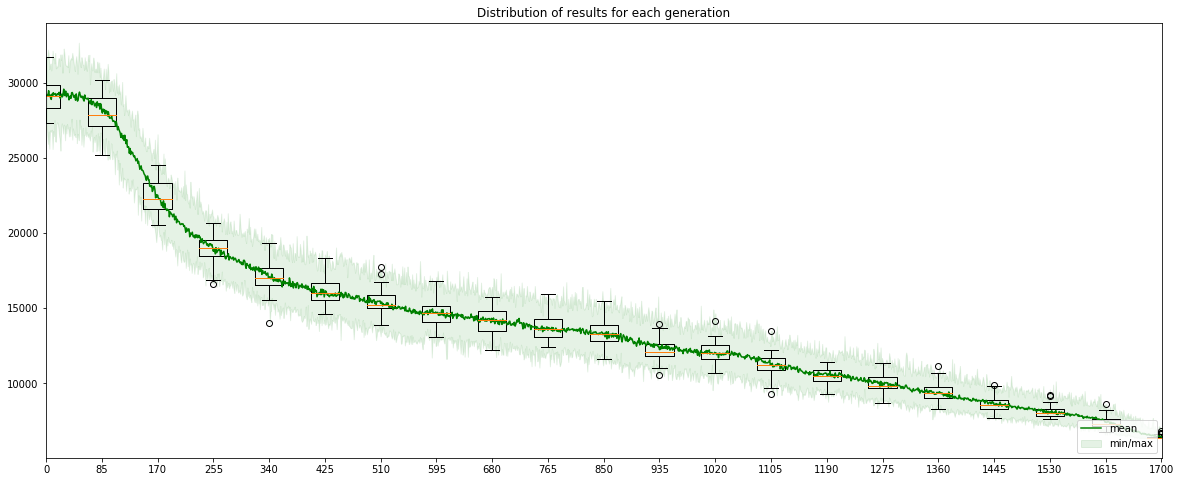

In [30]:
plot_evolution(scores_1, 20)

In [37]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_1, scores_1 = aco.run()

In [38]:
print('Best score for problem 1, alpha=1, beta=1: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=1:  3939


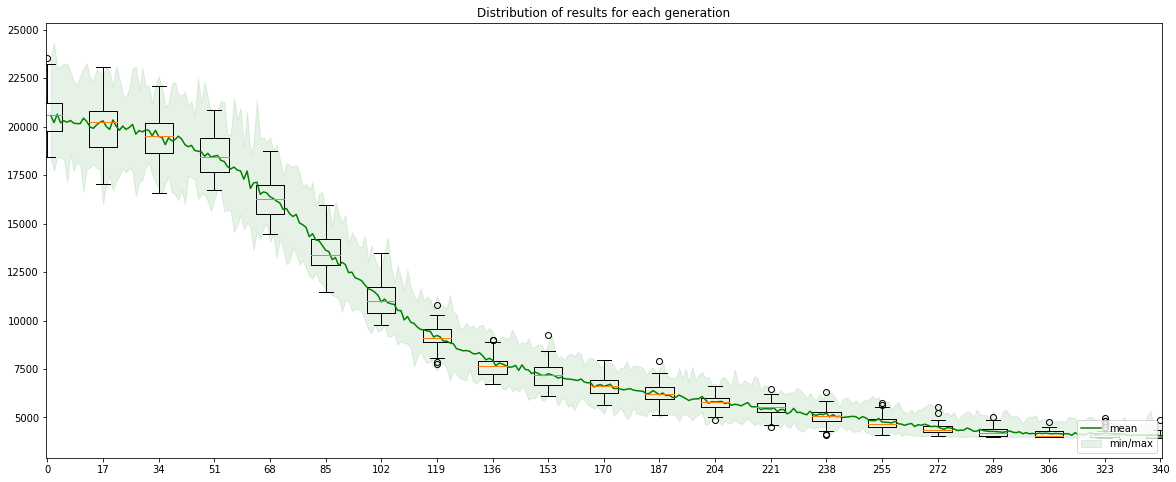

In [39]:
plot_evolution(scores_1, 20)

In [3]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 3, True)

solutions_1, scores_1 = aco.run()

In [21]:
print('Best score for problem 1, alpha=1, beta=2: ', scores_1[-1,0])

Best score for problem 1, alpha=1, beta=2:  3734


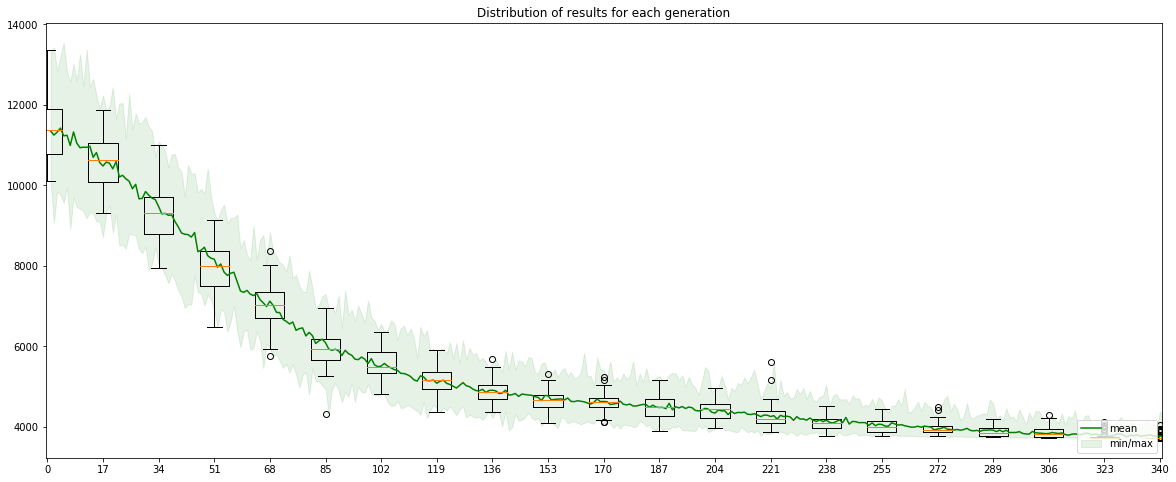

In [15]:
plot_evolution(scores_1, 20)

## Find ACO solution for problem 2

In [40]:
problem = TSPProblem(problem=2)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [41]:
print('Best score for problem 2, alpha=1, beta=0: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=0:  5258


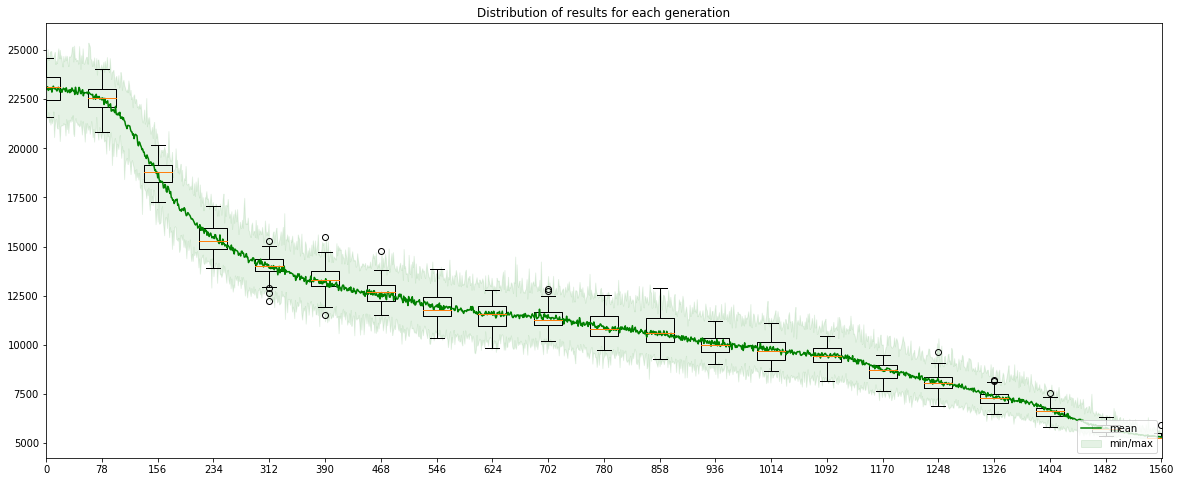

In [42]:
plot_evolution(scores_2, 20)

In [43]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [44]:
print('Best score for problem 2, alpha=1, beta=1: ', scores_2[-1,0])

Best score for problem 2, alpha=1, beta=1:  3157


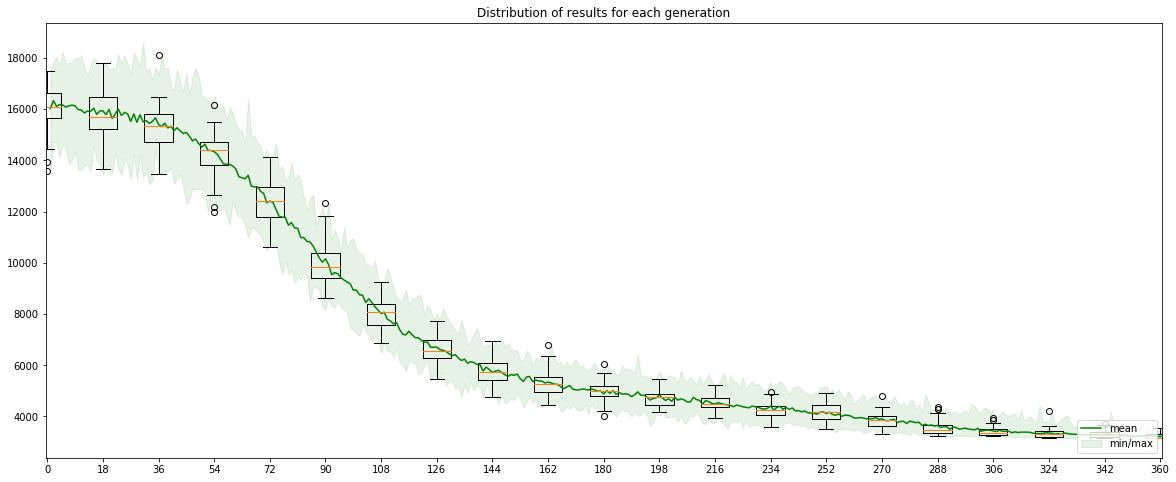

In [45]:
plot_evolution(scores_2, 20)

In [ ]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_2, scores_2 = aco.run()

In [8]:
print(scores_2[-1,0])

2979


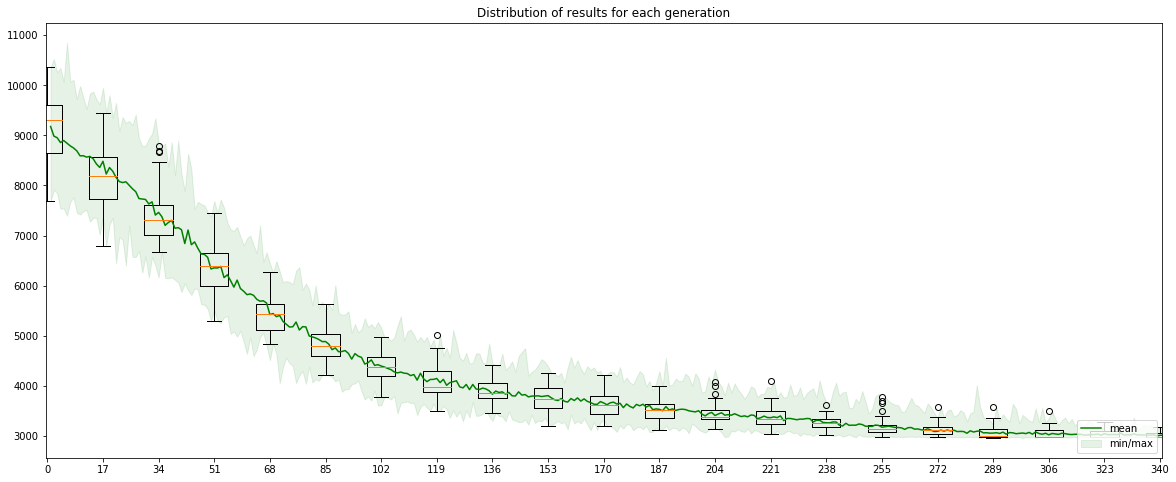

In [14]:
plot_evolution(scores_2, 20)

## Find ACO solution for problem 3

In [46]:
problem = TSPProblem(problem=3)
initializer = TSP_Initializer()
evaporator = Evaporator(rho=0.05)
intensifier = Intensifier(delta=0.05)
heuristic = TSPHeuristic
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=0, heuristic=None, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [47]:
print('Best score for problem 3, alpha=1, beta=0: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=0:  4774


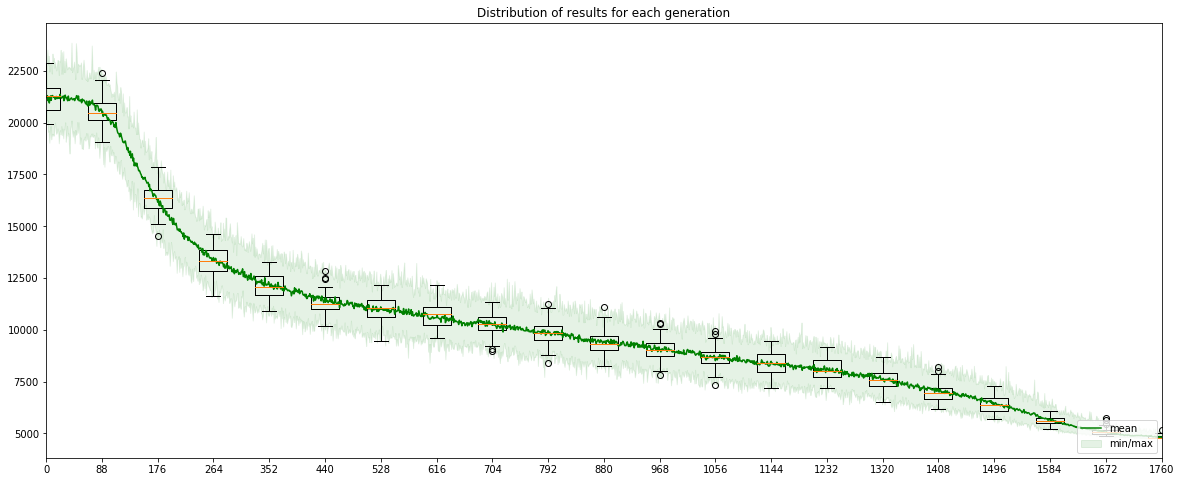

In [48]:
plot_evolution(scores_3, 20)

In [49]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=1, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [50]:
print('Best score for problem 3, alpha=1, beta=1: ', scores_3[-1,0])

Best score for problem 3, alpha=1, beta=1:  2856


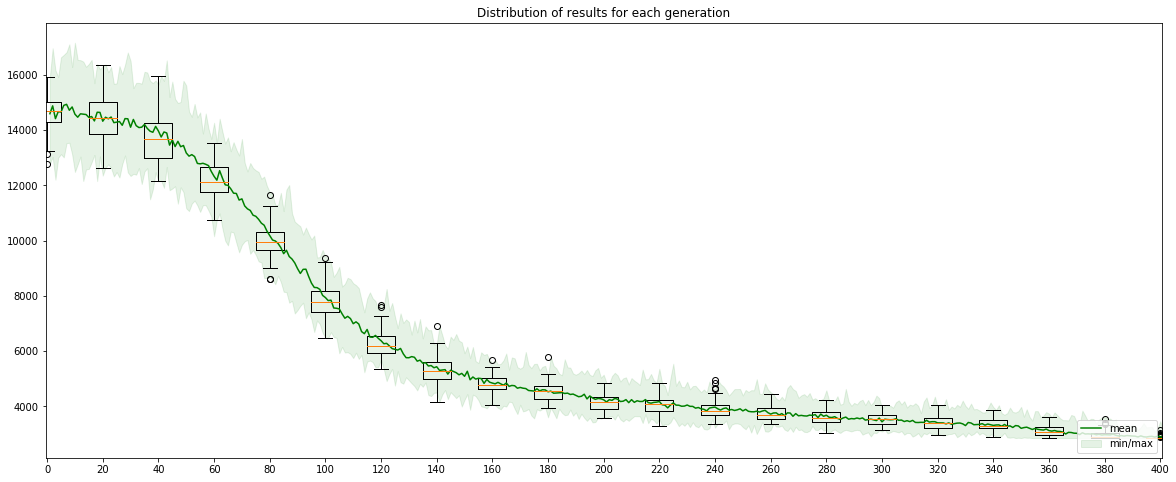

In [51]:
plot_evolution(scores_3, 20)

In [ ]:
solution_gen = PermutationSolutionGenerator(number_of_ants=50, alpha=1, beta=2, heuristic=heuristic, problem=problem)
terminator = [maxItTerminator(maxIt=2000), convergenceTerminator(maxIter=50)]
aco = Ant_Colony_Optimizer(problem, initializer, evaporator, intensifier, solution_gen, terminator, 1, False)

solutions_3, scores_3 = aco.run()

In [11]:
print(scores_3[-1,0])

2513


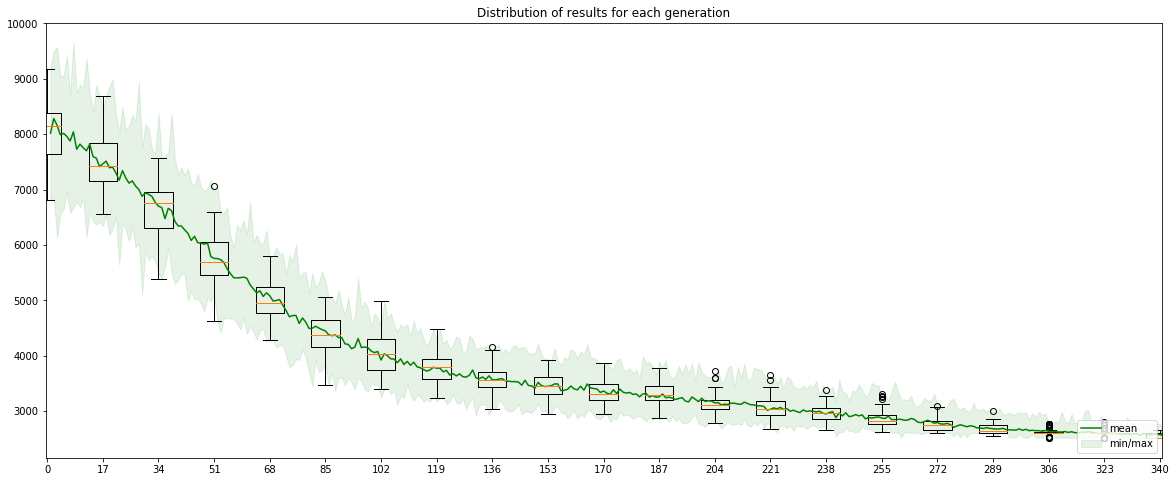

In [13]:
plot_evolution(scores_3, 20)